Weather ETL

![bttf image](bttflogo.png)

Data is being collected to understand what were the weather conditions during a shipment and how those conditions influence the fuel consumption. 

In order to showcase my interpretation of the solution the transformation is dissected and showing all the outputs for the specific cell.

In this case the weather data arrives into a landing zone, so in order to reach it let's glob the files:

*Globbing this data takes about 50 secs and the current storage use of the landing zone is 2.26 MB



In [1]:
import glob
import os
import json
import pandas as pd



# getting the json files names from the landing zone and appending into the data dict
globbed_files = glob.glob(r"C:/Users/E.ALVAREZHERNANDEZ/VS Projects/caseStudy/landing_zone/weather/*.json")

data = [] 
for file in globbed_files:
    frame = pd.read_json(file, lines=True)
    data.append(frame)

data


[        lat       lon      city  \
 0  47.49835  19.04045  Budapest   
 
                                              weather  
 0  {'dt': 1656637200, 'temp': -11, 'wind': [{'win...  ,
        lat      lon    city                                            weather
 0  40.4165 -3.70256  Madrid  {'dt': 1656637200, 'temp': 46, 'wind': [{'wind...,
     lat       lon   city                                            weather
 0  53.9  27.56667  Minsk  {'dt': 1656637200, 'temp': 5, 'wind': [{'wind_...,
         lat       lon    city  \
 0  55.75222  37.61556  Moscow   
 
                                              weather  
 0  {'dt': 1656637200, 'temp': 45, 'wind': [{'wind...  ,
         lat       lon    city  \
 0  52.22977  21.01178  Warsaw   
 
                                              weather  
 0  {'dt': 1656637200, 'temp': 22, 'wind': [{'wind...  ,
         lat       lon    city  \
 0  39.91987  32.85427  Ankara   
 
                                              weather  
 0  {

In [2]:
#Concatenating everything into a single dataframe

df = pd.concat(data, ignore_index=True)

df

,lat,lon,city,weather
0,47.49835,19.04045,Budapest,"{'dt': 1656637200, 'temp': -11, 'wind': [{'win..."
1,40.41650,-3.70256,Madrid,"{'dt': 1656637200, 'temp': 46, 'wind': [{'wind..."
2,53.90000,27.56667,Minsk,"{'dt': 1656637200, 'temp': 5, 'wind': [{'wind_..."
3,55.75222,37.61556,Moscow,"{'dt': 1656637200, 'temp': 45, 'wind': [{'wind..."
4,52.22977,21.01178,Warsaw,"{'dt': 1656637200, 'temp': 22, 'wind': [{'wind..."
...,...,...,...,...
10135,51.50853,-0.12574,London,"{'dt': 1659384000, 'temp': -13, 'wind': [{'win..."
10136,40.41650,-3.70256,Madrid,"{'dt': 1659384000, 'temp': -2, 'wind': [{'wind..."
10137,40.41650,-3.70256,Madrid,"{'dt': 1659394800, 'temp': -27, 'wind': [{'win..."
10138,55.75222,37.61556,Moscow,"{'dt': 1659402000, 'temp': 37, 'wind': [{'wind..."


1. Flattening: 

Our first challenge is to flatten the data, since relevant values are in a struct form.

In [4]:
#First I normalize the first level of the wind column
from pandas import json_normalize


df = df.join(json_normalize(df['weather'].to_list()))\
       .drop(['weather'], axis=1)

df

,lat,lon,city,dt,temp,wind,clouds,humidity,pressure,feels_like,visibility
0,47.49835,19.04045,Budapest,1656637200,-11,"[{'wind_deg': -9.9, 'wind_speed': 95}]",6,23,1013,-12.1,10000
1,40.41650,-3.70256,Madrid,1656637200,46,"[{'wind_deg': 41.4, 'wind_speed': 17}]",100,15,1019,50.6,10000
2,53.90000,27.56667,Minsk,1656637200,5,"[{'wind_deg': 4.5, 'wind_speed': 74}]",47,27,1009,5.5,10000
3,55.75222,37.61556,Moscow,1656637200,45,"[{'wind_deg': 40.5, 'wind_speed': 68}]",51,24,1015,49.5,10000
4,52.22977,21.01178,Warsaw,1656637200,22,"[{'wind_deg': 19.8, 'wind_speed': 25}]",92,13,1007,24.2,10000
...,...,...,...,...,...,...,...,...,...,...,...
10135,51.50853,-0.12574,London,1659384000,-13,"[{'wind_deg': -11.7, 'wind_speed': 95}]",51,15,1005,-14.3,10000
10136,40.41650,-3.70256,Madrid,1659384000,-2,"[{'wind_deg': -1.8, 'wind_speed': 98}]",43,22,1019,-2.2,10000
10137,40.41650,-3.70256,Madrid,1659394800,-27,"[{'wind_deg': -24.3, 'wind_speed': 29}]",88,18,1007,-29.7,10000
10138,55.75222,37.61556,Moscow,1659402000,37,"[{'wind_deg': 33.3, 'wind_speed': 75}]",65,13,1016,40.7,10000


In [5]:
#Normalize to enter into the second level
df = df.join(json_normalize(df['wind'].to_list()))\
       .drop(['wind'], axis=1)

df

,lat,lon,city,dt,temp,clouds,humidity,pressure,feels_like,visibility,0
0,47.49835,19.04045,Budapest,1656637200,-11,6,23,1013,-12.1,10000,"{'wind_deg': -9.9, 'wind_speed': 95}"
1,40.41650,-3.70256,Madrid,1656637200,46,100,15,1019,50.6,10000,"{'wind_deg': 41.4, 'wind_speed': 17}"
2,53.90000,27.56667,Minsk,1656637200,5,47,27,1009,5.5,10000,"{'wind_deg': 4.5, 'wind_speed': 74}"
3,55.75222,37.61556,Moscow,1656637200,45,51,24,1015,49.5,10000,"{'wind_deg': 40.5, 'wind_speed': 68}"
4,52.22977,21.01178,Warsaw,1656637200,22,92,13,1007,24.2,10000,"{'wind_deg': 19.8, 'wind_speed': 25}"
...,...,...,...,...,...,...,...,...,...,...,...
10135,51.50853,-0.12574,London,1659384000,-13,51,15,1005,-14.3,10000,"{'wind_deg': -11.7, 'wind_speed': 95}"
10136,40.41650,-3.70256,Madrid,1659384000,-2,43,22,1019,-2.2,10000,"{'wind_deg': -1.8, 'wind_speed': 98}"
10137,40.41650,-3.70256,Madrid,1659394800,-27,88,18,1007,-29.7,10000,"{'wind_deg': -24.3, 'wind_speed': 29}"
10138,55.75222,37.61556,Moscow,1659402000,37,65,13,1016,40.7,10000,"{'wind_deg': 33.3, 'wind_speed': 75}"


In [6]:
#Getting into the wind information
df = df.join(json_normalize(df[0].to_list()))\
       .drop([0], axis=1)

df

,lat,lon,city,dt,temp,clouds,humidity,pressure,feels_like,visibility,wind_deg,wind_speed
0,47.49835,19.04045,Budapest,1656637200,-11,6,23,1013,-12.1,10000,-9.9,95
1,40.41650,-3.70256,Madrid,1656637200,46,100,15,1019,50.6,10000,41.4,17
2,53.90000,27.56667,Minsk,1656637200,5,47,27,1009,5.5,10000,4.5,74
3,55.75222,37.61556,Moscow,1656637200,45,51,24,1015,49.5,10000,40.5,68
4,52.22977,21.01178,Warsaw,1656637200,22,92,13,1007,24.2,10000,19.8,25
...,...,...,...,...,...,...,...,...,...,...,...,...
10135,51.50853,-0.12574,London,1659384000,-13,51,15,1005,-14.3,10000,-11.7,95
10136,40.41650,-3.70256,Madrid,1659384000,-2,43,22,1019,-2.2,10000,-1.8,98
10137,40.41650,-3.70256,Madrid,1659394800,-27,88,18,1007,-29.7,10000,-24.3,29
10138,55.75222,37.61556,Moscow,1659402000,37,65,13,1016,40.7,10000,33.3,75


2. DateTime Format:

 Datetime data is in an Epoch format, in order to be human readable we need to transform it into a datetime format.

In [7]:
#Time was in Epoch format so we need to change it into datetime

import datetime

df['dt'] = pd.to_datetime(df['dt'], unit='s')

df


,lat,lon,city,dt,temp,clouds,humidity,pressure,feels_like,visibility,wind_deg,wind_speed
0,47.49835,19.04045,Budapest,2022-07-01 01:00:00,-11,6,23,1013,-12.1,10000,-9.9,95
1,40.41650,-3.70256,Madrid,2022-07-01 01:00:00,46,100,15,1019,50.6,10000,41.4,17
2,53.90000,27.56667,Minsk,2022-07-01 01:00:00,5,47,27,1009,5.5,10000,4.5,74
3,55.75222,37.61556,Moscow,2022-07-01 01:00:00,45,51,24,1015,49.5,10000,40.5,68
4,52.22977,21.01178,Warsaw,2022-07-01 01:00:00,22,92,13,1007,24.2,10000,19.8,25
...,...,...,...,...,...,...,...,...,...,...,...,...
10135,51.50853,-0.12574,London,2022-08-01 20:00:00,-13,51,15,1005,-14.3,10000,-11.7,95
10136,40.41650,-3.70256,Madrid,2022-08-01 20:00:00,-2,43,22,1019,-2.2,10000,-1.8,98
10137,40.41650,-3.70256,Madrid,2022-08-01 23:00:00,-27,88,18,1007,-29.7,10000,-24.3,29
10138,55.75222,37.61556,Moscow,2022-08-02 01:00:00,37,65,13,1016,40.7,10000,33.3,75


3. Sinking weather into Data Lake:

The sink is being performed into parquet format and compressed in snappy in order to optimize performance and the storage use

In [8]:
#Sinking the clean data into the datalake, partitioned by city

df.to_parquet('C:/Users/E.ALVAREZHERNANDEZ/VS Projects/caseStudy/clean_data/weather/',compression='snappy', partition_cols='city')

4. Delta weather table:

As we recreate the data from the datalake parquet files the processing times improves, from 56 secs to 0.1 secs and the storage use from 2.26 MB to 320 KB, it reduces the size by 84%

In [9]:
#Pulling clean weather temperature

cweather = pd.read_parquet('C:/Users/E.ALVAREZHERNANDEZ/VS Projects/caseStudy/clean_data/weather')

cweather

,lat,lon,dt,temp,clouds,humidity,pressure,feels_like,visibility,wind_deg,wind_speed,city
0,39.91987,32.85427,2022-07-01 02:00:00,48,1,12,1015,52.8,10000,43.2,30,Ankara
1,39.91987,32.85427,2022-07-01 03:00:00,26,99,16,1010,28.6,10000,23.4,60,Ankara
2,39.91987,32.85427,2022-07-01 05:00:00,-26,25,13,1019,-28.6,10000,-23.4,32,Ankara
3,39.91987,32.85427,2022-07-01 06:00:00,10,53,16,1019,11.0,10000,9.0,9,Ankara
4,39.91987,32.85427,2022-07-01 10:00:00,-18,32,27,1010,-19.8,10000,-16.2,3,Ankara
...,...,...,...,...,...,...,...,...,...,...,...,...
10135,52.22977,21.01178,2022-07-31 11:00:00,37,18,14,1019,40.7,10000,33.3,70,Warsaw
10136,52.22977,21.01178,2022-07-31 12:00:00,24,77,21,1018,26.4,10000,21.6,64,Warsaw
10137,52.22977,21.01178,2022-07-31 14:00:00,-6,1,15,1019,-6.6,10000,-5.4,95,Warsaw
10138,52.22977,21.01178,2022-07-31 16:00:00,-5,73,20,1019,-5.5,10000,-4.5,84,Warsaw


In [10]:
#In order to get the avg temperature I will subset

temperature = cweather[['dt', 'temp', 'city']]

temperature

,dt,temp,city
0,2022-07-01 02:00:00,48,Ankara
1,2022-07-01 03:00:00,26,Ankara
2,2022-07-01 05:00:00,-26,Ankara
3,2022-07-01 06:00:00,10,Ankara
4,2022-07-01 10:00:00,-18,Ankara
...,...,...,...
10135,2022-07-31 11:00:00,37,Warsaw
10136,2022-07-31 12:00:00,24,Warsaw
10137,2022-07-31 14:00:00,-6,Warsaw
10138,2022-07-31 16:00:00,-5,Warsaw


5. Connecting with shipments DB:


In [11]:
import psycopg2
import logging

conn = psycopg2.connect(host='localhost',
                        database='bttf',
                        user='postgres',
                        password='Zurich2022!',
                        port='5432')



In [12]:
pointer = conn.cursor()

pointer.execute("SELECT * FROM shipments.shipments")

rows = pointer.fetchall() #Tupple format


In [13]:
shdf = pd.DataFrame(rows, columns=['id', 'truck', 'driver', 'shipment_start_timestamp', 'shipment_end_timestamp', 'start_location', 'end_location', 'shipment_distance', 'consumed_fuel'])
shdf

,id,truck,driver,shipment_start_timestamp,shipment_end_timestamp,start_location,end_location,shipment_distance,consumed_fuel
0,9919,6305,4272,2022-07-29 20:12:53.027776,2022-07-30 22:52:32.903400,Hamburg,Barcelona,1769.40660,342.89
1,9963,6931,3438,2022-07-23 19:33:42.412344,2022-07-25 07:43:57.066507,Hamburg,Ankara,2752.17850,506.77
2,9969,2514,4797,2022-07-29 18:01:08.431993,2022-07-30 06:24:11.660956,Hamburg,London,865.48140,161.01
3,9913,2531,9127,2022-07-06 00:16:40.813996,2022-07-06 14:22:57.521956,Hamburg,Stockholm,974.03534,180.04
4,9691,9035,7504,2022-07-18 01:01:13.147528,2022-07-18 17:31:10.597189,Hamburg,Budapest,1113.69500,204.33
...,...,...,...,...,...,...,...,...,...
9440,1193,9871,3150,2022-07-28 11:45:55.328784,2022-07-28 20:12:33.632634,Vienna,Warsaw,667.40424,111.79
9441,875,9443,1055,2022-07-10 20:16:38.103979,2022-07-11 04:53:11.526090,Vienna,Warsaw,667.40424,117.95
9442,462,6301,2606,2022-07-19 10:22:46.344214,2022-07-19 19:27:31.316003,Vienna,Warsaw,667.40424,118.04
9443,388,8058,4739,2022-07-03 20:23:03.033107,2022-07-04 05:38:58.188670,Vienna,Warsaw,667.40424,115.37


6. Fixing shipments timestamp formats:

Asumption: Weather doesn't have a big variance from hour to hour, so to facilitate the analysis I'm going to round the shipment hours to the closest hour.

In [14]:
#Dates are in sql format, so in here I invert them to match the df convention

import datetime


shdf['shipment_start_timestamp'] = pd.to_datetime(shdf['shipment_start_timestamp'] ).apply(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))
shdf['shipment_end_timestamp'] = pd.to_datetime(shdf['shipment_end_timestamp'] ).apply(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))
shdf['shipment_start_timestamp'] = pd.to_datetime(shdf['shipment_start_timestamp'])
shdf['shipment_end_timestamp'] = pd.to_datetime(shdf['shipment_end_timestamp'])



shdf

,id,truck,driver,shipment_start_timestamp,shipment_end_timestamp,start_location,end_location,shipment_distance,consumed_fuel
0,9919,6305,4272,2022-07-29 20:12:53,2022-07-30 22:52:32,Hamburg,Barcelona,1769.40660,342.89
1,9963,6931,3438,2022-07-23 19:33:42,2022-07-25 07:43:57,Hamburg,Ankara,2752.17850,506.77
2,9969,2514,4797,2022-07-29 18:01:08,2022-07-30 06:24:11,Hamburg,London,865.48140,161.01
3,9913,2531,9127,2022-07-06 00:16:40,2022-07-06 14:22:57,Hamburg,Stockholm,974.03534,180.04
4,9691,9035,7504,2022-07-18 01:01:13,2022-07-18 17:31:10,Hamburg,Budapest,1113.69500,204.33
...,...,...,...,...,...,...,...,...,...
9440,1193,9871,3150,2022-07-28 11:45:55,2022-07-28 20:12:33,Vienna,Warsaw,667.40424,111.79
9441,875,9443,1055,2022-07-10 20:16:38,2022-07-11 04:53:11,Vienna,Warsaw,667.40424,117.95
9442,462,6301,2606,2022-07-19 10:22:46,2022-07-19 19:27:31,Vienna,Warsaw,667.40424,118.04
9443,388,8058,4739,2022-07-03 20:23:03,2022-07-04 05:38:58,Vienna,Warsaw,667.40424,115.37


In [15]:
shdf['shipment_start_timestamp'] = shdf['shipment_start_timestamp'].dt.round('H')
shdf['shipment_end_timestamp'] = shdf['shipment_end_timestamp'].dt.round('H')
shdf['fConsumption']= (shdf['consumed_fuel']*100)/shdf['shipment_distance']
shdf


,id,truck,driver,shipment_start_timestamp,shipment_end_timestamp,start_location,end_location,shipment_distance,consumed_fuel,fConsumption
0,9919,6305,4272,2022-07-29 20:00:00,2022-07-30 23:00:00,Hamburg,Barcelona,1769.40660,342.89,19.378813
1,9963,6931,3438,2022-07-23 20:00:00,2022-07-25 08:00:00,Hamburg,Ankara,2752.17850,506.77,18.413413
2,9969,2514,4797,2022-07-29 18:00:00,2022-07-30 06:00:00,Hamburg,London,865.48140,161.01,18.603519
3,9913,2531,9127,2022-07-06 00:00:00,2022-07-06 14:00:00,Hamburg,Stockholm,974.03534,180.04,18.483929
4,9691,9035,7504,2022-07-18 01:00:00,2022-07-18 18:00:00,Hamburg,Budapest,1113.69500,204.33,18.347034
...,...,...,...,...,...,...,...,...,...,...
9440,1193,9871,3150,2022-07-28 12:00:00,2022-07-28 20:00:00,Vienna,Warsaw,667.40424,111.79,16.749969
9441,875,9443,1055,2022-07-10 20:00:00,2022-07-11 05:00:00,Vienna,Warsaw,667.40424,117.95,17.672947
9442,462,6301,2606,2022-07-19 10:00:00,2022-07-19 19:00:00,Vienna,Warsaw,667.40424,118.04,17.686432
9443,388,8058,4739,2022-07-03 20:00:00,2022-07-04 06:00:00,Vienna,Warsaw,667.40424,115.37,17.286375


7. Merging data:

In this step we merge the dataframes to get the weather conditions at location and time for the shipments

In [16]:
#Merging to get the first temperature matching the start location and the start timestamp


dfmerge = pd.merge(shdf, temperature, how='left', left_on=[shdf['start_location'].astype(str), shdf['shipment_start_timestamp'].astype(str)], right_on=[temperature['city'].astype(str), temperature['dt'].astype(str)])
dfmerge= dfmerge.rename(columns={'temp':'startTemp'}).drop(['key_0', 'key_1', 'city', 'dt'], axis=1)

dfmerge

,id,truck,driver,shipment_start_timestamp,shipment_end_timestamp,start_location,end_location,shipment_distance,consumed_fuel,fConsumption,startTemp
0,9919,6305,4272,2022-07-29 20:00:00,2022-07-30 23:00:00,Hamburg,Barcelona,1769.40660,342.89,19.378813,3.0
1,9963,6931,3438,2022-07-23 20:00:00,2022-07-25 08:00:00,Hamburg,Ankara,2752.17850,506.77,18.413413,NaN
2,9969,2514,4797,2022-07-29 18:00:00,2022-07-30 06:00:00,Hamburg,London,865.48140,161.01,18.603519,23.0
3,9913,2531,9127,2022-07-06 00:00:00,2022-07-06 14:00:00,Hamburg,Stockholm,974.03534,180.04,18.483929,20.0
4,9691,9035,7504,2022-07-18 01:00:00,2022-07-18 18:00:00,Hamburg,Budapest,1113.69500,204.33,18.347034,27.0
...,...,...,...,...,...,...,...,...,...,...,...
9440,1193,9871,3150,2022-07-28 12:00:00,2022-07-28 20:00:00,Vienna,Warsaw,667.40424,111.79,16.749969,-17.0
9441,875,9443,1055,2022-07-10 20:00:00,2022-07-11 05:00:00,Vienna,Warsaw,667.40424,117.95,17.672947,25.0
9442,462,6301,2606,2022-07-19 10:00:00,2022-07-19 19:00:00,Vienna,Warsaw,667.40424,118.04,17.686432,-17.0
9443,388,8058,4739,2022-07-03 20:00:00,2022-07-04 06:00:00,Vienna,Warsaw,667.40424,115.37,17.286375,45.0


In [17]:
#Merging to get the end temperature matching the end location and the end timestamp


dfmerge2 = pd.merge(dfmerge, temperature, how='left', left_on=[dfmerge['end_location'].astype(str), dfmerge['shipment_end_timestamp'].astype(str)], right_on=[temperature['city'].astype(str), temperature['dt'].astype(str)])
dfmerge2= dfmerge2.drop(['key_0', 'key_1', 'dt', 'city'], axis=1).rename(columns={'temp':'endTemp'})
dfmerge2

,id,truck,driver,shipment_start_timestamp,shipment_end_timestamp,start_location,end_location,shipment_distance,consumed_fuel,fConsumption,startTemp,endTemp
0,9919,6305,4272,2022-07-29 20:00:00,2022-07-30 23:00:00,Hamburg,Barcelona,1769.40660,342.89,19.378813,3.0,NaN
1,9963,6931,3438,2022-07-23 20:00:00,2022-07-25 08:00:00,Hamburg,Ankara,2752.17850,506.77,18.413413,NaN,-2.0
2,9969,2514,4797,2022-07-29 18:00:00,2022-07-30 06:00:00,Hamburg,London,865.48140,161.01,18.603519,23.0,-14.0
3,9913,2531,9127,2022-07-06 00:00:00,2022-07-06 14:00:00,Hamburg,Stockholm,974.03534,180.04,18.483929,20.0,31.0
4,9691,9035,7504,2022-07-18 01:00:00,2022-07-18 18:00:00,Hamburg,Budapest,1113.69500,204.33,18.347034,27.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9440,1193,9871,3150,2022-07-28 12:00:00,2022-07-28 20:00:00,Vienna,Warsaw,667.40424,111.79,16.749969,-17.0,44.0
9441,875,9443,1055,2022-07-10 20:00:00,2022-07-11 05:00:00,Vienna,Warsaw,667.40424,117.95,17.672947,25.0,21.0
9442,462,6301,2606,2022-07-19 10:00:00,2022-07-19 19:00:00,Vienna,Warsaw,667.40424,118.04,17.686432,-17.0,-11.0
9443,388,8058,4739,2022-07-03 20:00:00,2022-07-04 06:00:00,Vienna,Warsaw,667.40424,115.37,17.286375,45.0,15.0


In [18]:
#Getting the average temperature for the trip, and setting the timestamp to datetime as it was required to pass them as strings for the merge

shipment = dfmerge2

shipment['avgTemp']= shipment[['startTemp','endTemp']].mean(axis=1)


shipment['shipment_start_timestamp'] = pd.to_datetime(shipment['shipment_start_timestamp'])
shipment['shipment_end_timestamp'] = pd.to_datetime(shipment['shipment_end_timestamp'])

shipment['duration'] = (shipment['shipment_end_timestamp'] - shipment['shipment_start_timestamp']).astype('timedelta64[h]')

shipment

,id,truck,driver,shipment_start_timestamp,shipment_end_timestamp,start_location,end_location,shipment_distance,consumed_fuel,fConsumption,startTemp,endTemp,avgTemp,duration
0,9919,6305,4272,2022-07-29 20:00:00,2022-07-30 23:00:00,Hamburg,Barcelona,1769.40660,342.89,19.378813,3.0,NaN,3.0,27.0
1,9963,6931,3438,2022-07-23 20:00:00,2022-07-25 08:00:00,Hamburg,Ankara,2752.17850,506.77,18.413413,NaN,-2.0,-2.0,36.0
2,9969,2514,4797,2022-07-29 18:00:00,2022-07-30 06:00:00,Hamburg,London,865.48140,161.01,18.603519,23.0,-14.0,4.5,12.0
3,9913,2531,9127,2022-07-06 00:00:00,2022-07-06 14:00:00,Hamburg,Stockholm,974.03534,180.04,18.483929,20.0,31.0,25.5,14.0
4,9691,9035,7504,2022-07-18 01:00:00,2022-07-18 18:00:00,Hamburg,Budapest,1113.69500,204.33,18.347034,27.0,19.0,23.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9440,1193,9871,3150,2022-07-28 12:00:00,2022-07-28 20:00:00,Vienna,Warsaw,667.40424,111.79,16.749969,-17.0,44.0,13.5,8.0
9441,875,9443,1055,2022-07-10 20:00:00,2022-07-11 05:00:00,Vienna,Warsaw,667.40424,117.95,17.672947,25.0,21.0,23.0,9.0
9442,462,6301,2606,2022-07-19 10:00:00,2022-07-19 19:00:00,Vienna,Warsaw,667.40424,118.04,17.686432,-17.0,-11.0,-14.0,9.0
9443,388,8058,4739,2022-07-03 20:00:00,2022-07-04 06:00:00,Vienna,Warsaw,667.40424,115.37,17.286375,45.0,15.0,30.0,10.0


In [ ]:
#The correlation matrix shows some results already


shipment.corr()

In [26]:
#Sinking the clean data into the datalake


shipment.to_parquet('C:/Users/E.ALVAREZHERNANDEZ/VS Projects/caseStudy/clean_data/DataLake/gold.parquet',compression='snappy')

8. Plotting the correlation:

Since the weather temperature seems to be fake data, f.e: Barcelona couldn't be -12Celsius in July, the correlation is cohorsed and next I'm plotting the the relation to make it visual

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
analysis = pd.read_parquet('C:/Users/E.ALVAREZHERNANDEZ/VS Projects/caseStudy/clean_data/DataLake/gold.parquet')

analysis

,id,truck,driver,shipment_start_timestamp,shipment_end_timestamp,start_location,end_location,shipment_distance,consumed_fuel,fConsumption,startTemp,endTemp,avgTemp,duration
0,9919,6305,4272,2022-07-29 20:00:00,2022-07-30 23:00:00,Hamburg,Barcelona,1769.40660,342.89,19.378813,3.0,NaN,3.0,27.0
1,9963,6931,3438,2022-07-23 20:00:00,2022-07-25 08:00:00,Hamburg,Ankara,2752.17850,506.77,18.413413,NaN,-2.0,-2.0,36.0
2,9969,2514,4797,2022-07-29 18:00:00,2022-07-30 06:00:00,Hamburg,London,865.48140,161.01,18.603519,23.0,-14.0,4.5,12.0
3,9913,2531,9127,2022-07-06 00:00:00,2022-07-06 14:00:00,Hamburg,Stockholm,974.03534,180.04,18.483929,20.0,31.0,25.5,14.0
4,9691,9035,7504,2022-07-18 01:00:00,2022-07-18 18:00:00,Hamburg,Budapest,1113.69500,204.33,18.347034,27.0,19.0,23.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9440,1193,9871,3150,2022-07-28 12:00:00,2022-07-28 20:00:00,Vienna,Warsaw,667.40424,111.79,16.749969,-17.0,44.0,13.5,8.0
9441,875,9443,1055,2022-07-10 20:00:00,2022-07-11 05:00:00,Vienna,Warsaw,667.40424,117.95,17.672947,25.0,21.0,23.0,9.0
9442,462,6301,2606,2022-07-19 10:00:00,2022-07-19 19:00:00,Vienna,Warsaw,667.40424,118.04,17.686432,-17.0,-11.0,-14.0,9.0
9443,388,8058,4739,2022-07-03 20:00:00,2022-07-04 06:00:00,Vienna,Warsaw,667.40424,115.37,17.286375,45.0,15.0,30.0,10.0


In [3]:
analysis = analysis[analysis['start_location']=='Barcelona']
analysis= analysis[['fConsumption', 'avgTemp']]


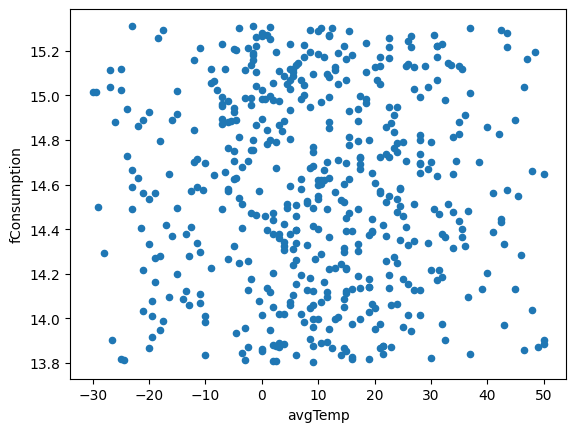

In [29]:
analysis.plot(kind='scatter',x='avgTemp', y='fConsumption')
plt.show()



In [35]:
import numpy as np
import scipy.stats

analysis = analysis.dropna(subset=['avgTemp'])

x = analysis['avgTemp']
y = analysis['fConsumption']



scipy.stats.pearsonr(x,y)

scipy.stats.spearmanr(x,y)

scipy.stats.kendalltau(x,y)

result = scipy.stats.linregress(x,y)
result.slope
result.intercept
result.rvalue
result.pvalue
result.stderr

0.0011056907795555149

In [44]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)

line = f'Regression line: y:{intercept:.2f}+{slope:.2f}x, r={r:.2f}'

line

-0.0004218479095343969

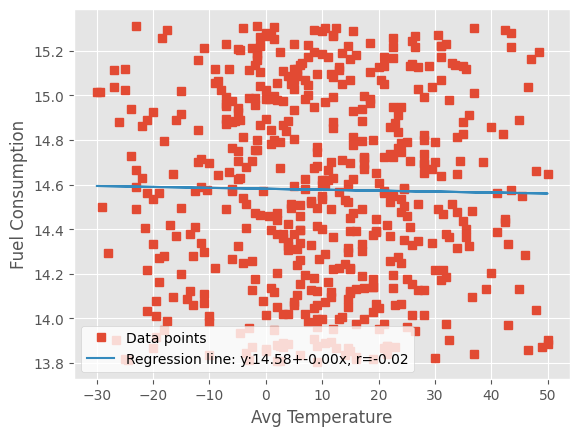

In [43]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope*x, label=line)
ax.set_xlabel('Avg Temperature')
ax.set_ylabel('Fuel Consumption')
ax.legend(facecolor='white')
plt.show()